# Yellow Cab (Advisory Case for Accountants)
Version 04.07 (**Modified for Google Colab**)

**Author Information:**
<br>Jessen Hobson, Ph.D. & Vic Anand, Ph.D.
<br>Department of Accountancy – University of Illinois at Urbana-Champaign 
<br>(We thank The Deloitte Foundation for their generous financial support in preparation of this case.)

▶️ Run the code cell below to import packages used in **🧭 Check Your Work** sections and by the autograder.

In [ ]:
# Required for intermediate checks and autograder scripts
import unittest
import os
import glob
tc = unittest.TestCase()

▶️ Run the code cell below to import packages used in your analyses.

In [ ]:
import pandas as pd 
import numpy as np
import statsmodels.formula.api as smf
%matplotlib inline

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## Before Getting Started

---

### 📌 Install Tableau

- You will need a local copy of Tableau. Obtain a free license at [https://www.tableau.com/academic/students](https://www.tableau.com/academic/students) if your license from ACCY 570 has expired.
- Obtain the license before starting the case to prevent delay since it can take 5-7 days to get your application approved.

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## 🔭 Part 1: Learning Objectives

### Python
* Store and access data via Pandas and CSV
* Clean data in Pandas
* Descriptive analytics
* Predictive analytics using regression
* Story telling from a business analytics point of view

### Tableau
* Descriptive analytics: Visualization via box plots, scatter plots, and maps
* Story telling from a business analytics point of view

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## ✨ Part 2: Introduction

Yellow Cab Chicago has hired your small accounting and consulting firm to help them reduce costs and increase revenues. Like many traditional cab companies, Yellow Cab is feeling significant pressure from ride-hailing companies like Lyft and Uber. You are a recent graduate and new to the firm and are excited to learn you will have a role in this engagement. Your excitement quickly turns to apprehension, however, when the partner pulls you into her office.

"Thanks for meeting with me," she says. "This new engagement is really important to the firm, and I am happy you are on board. I heard that you have some data analytics skills. I would like you to see if there is any data out there that might help us learn more about the situation Yellow Cab is in and if there are any interesting revenue opportunities out there that we have not thought of. We need to know more about what Yellow Cab is facing and were they should be focusing their efforts?"

You are a little overwhelmed, but after a quick internet search you find out that the [city of Chicago makes a lot of data about cab trips publicly available](https://data.cityofchicago.org/Transportation/Taxi-Trips-2020/r2u4-wwk3). This is just what you need!

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## 🔬 Part 3: Load and Look at the Data

---

### 🎯 Part 3A: Read the CSV files into Pandas DataFrames

▶️ Run the code cell below to read the dataset into a DataFrame named `df`.

In [ ]:
# YOUR CODE BEGINS
df = pd.read_csv('https://github.com/accy575-uiuc/datasets/blob/main/yellow-cab-case/chicago-taxi-trips-2020.csv.gz?raw=true',
                  compression='gzip')
# YOUR CODE ENDS

df.head(5)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ <span style="color: green;">If the code cell runs without an error, you're good to move on.</span>
- ❌ <span style="color: red;">If the code cell throws an error, go back and fix incorrect parts.</span>

In [ ]:
tc.assertEqual(df.shape, (500000, 19), 'Number of rows and columns must match the original CSV file')
tc.assertEqual(df.columns.tolist(), ['trip_id', 'taxi_id', 'fare', 'tolls', 'extras',
    'tips', 'trip_total', 'payment_type', 'trip_seconds', 'trip_miles', 'trip_start_timestamp',
    'trip_end_timestamp', 'pickup_community_area', 'dropoff_community_area', 'pickup_centroid_latitude',
    'pickup_centroid_longitude', 'dropoff_centroid_latitude', 'dropoff_centroid_longitude', 'company'], 
    'Column names must match the original CSV file')

---

### 🎯 Part 3B: Find the number of rows and columns in the dataset

#### 👇 Tasks

- ✔️ Store the number of rows in `df` to a new variable named `num_rows`.
- ✔️ Store the number of columns in `df` to a new variable named `num_cols`.
- ✔️ Both `num_rows` and `num_cols` must be `int`s.

In [ ]:
# YOUR CODE BEGINS


# YOUR CODE ENDS

print(f'There are {num_rows} rows and {num_cols} columns in the dataset.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ <span style="color: green;">If the code cell runs without an error, you're good to move on.</span>
- ❌ <span style="color: red;">If the code cell throws an error, go back and fix incorrect parts.</span>

In [ ]:
tc.assertEqual(num_rows, 500000, f'Number of rows should be {500000}')
tc.assertEqual(num_cols, 19, f'Number of columns should be {19}')

---

### 🎯 Part 3C: Concise summary of the dataset

#### 👇 Tasks

- ✔️ Use the `info()` method to print out a concise summary of `df`.

#### 🚀 Hint

- `my_dataframe.info()` prints out a concise summary of `my_dataframe`.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

---

### 🎯 Part 3D: ✏️ Do any columns have null values?

#### 👇 Tasks

- ✔️ In the markdown cell below, briefly discuss whether any of the DataFrame columns have null values (missing values).
- ✔️ If there are columns that contain null values, which ones are they?
- ✔️ **(Optional)** You can add a code cell to find columns with missing values programmatically.

<p style="color: blue;">
YOUR RESPONSE HERE
</p>

---

### 🎯 Part 3E: ✏️ Potentially interesting columns

▶️ Run the code cell below to randomly sample 5 rows from `df`.

In [ ]:
df.sample(5)

#### 👇 Tasks

- ✔️ In the markdown cell below, discuss the following in less than 5 sentences:
    1. Which column(s) seem most interesting for analysis?
    2. What are you going to have to do to clean them?
- ✔️ This is an open-ended question. There is no right or wrong answers.

<p style="color: blue;">
YOUR RESPONSE HERE
</p>

---

### 🎯 Part 3F: Add `fare`, `tolls`, `extras`, and `tips`

The column `trip_total` is the total amount paid by the customer to the taxi driver. According to the data source ([Chicago Data Portal Taxi Trips 2020](https://data.cityofchicago.org/Transportation/Taxi-Trips-2020/r2u4-wwk3)), `fare`, `tolls`, `extras`, and `tips` should add up to `trip_total`. Your goal is to check whether the values add up perfectly or not.

| Column Name  | Description                                                        |
|--------------|--------------------------------------------------------------------|
| `fare`       | The fare for the trip                                              |
| `tolls`      | The tolls for the trip                                             |
| `extras`     | Extra charges for the trip                                         |
| `tips`       | The tip for the trip - cash tips generally will not be recorded    |
| `trip_total` | Total cost of the trip, **the total of the previous four columns** |

▶️ Run the code cell below to randomly sample 10 rows from `df` with the 5 columns listed above.

In [ ]:
df.sample(10)[['fare', 'tolls', 'extras', 'tips', 'trip_total']]

#### 👇 Tasks

- ✔️ Find the mean absolute difference between `trip_total` and `fare + tolls + extras + tips`.
- ✔️ Store the result to a new variable named `trip_total_mean_diff`.
- ✔️ `trip_total_mean_diff` should be a `float`-type.
- ✔️ Your `df` should remain unaltered after your code runs.
    - If you create a new column for calculation, make sure to drop it back.
    - You can calculate the mean absolute difference without creating a new column. Refer to the steps described in the **🚀 Hints** section below.

#### 🚀 Hints

1. Assume columns `A`, `B`, `C` are all numeric columns in a DataFrame named `df`.
2. Calculate the difference between `A` and `B + C` using `df['A'] - (df['B'] + df['C'])`. This returns a `Series` of differences (numbers).
3. Convert all values in the `Series` to absolute values using `my_series.abs()`.
4. Finally, take the mean of the `Series` using `my_series.mean()`. This value is the mean absolute difference.
5. In one liner, the code would be `(df['A'] - (df['B'] + df['C'])).abs().mean()`.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

print(f'The mean absolute difference between trip_total and fare + tolls + extras + tips is ${trip_total_mean_diff:.3f}.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ <span style="color: green;">If the code cell runs without an error, you're good to move on.</span>
- ❌ <span style="color: red;">If the code cell throws an error, go back and fix incorrect parts.</span>

In [ ]:
tc.assertEqual(df.shape, (500000, 19), 'You should not modify df (e.g., add columns) in this part')
tc.assertAlmostEqual(trip_total_mean_diff, 0.10755801440909508)

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## 🚿 Part 4: Clean Data

---

### 🎯 Part 4A: Delete trips with missing duration or mileage information

#### 👇 Tasks

- ✔️ From `df`, delete rows with a missing value in either `trip_seconds` or `trip_miles` columns.
- ✔️ Update `df` directly without creating a new `DataFrame`.

#### 🚀 Hint

- Remember `df.dropna(subset=['col1', 'col2'], inplace=...)`?

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

print(f'{df.shape[0]} rows remaining after dropping rows with missing trip_seconds or trip_miles')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ <span style="color: green;">If the code cell runs without an error, you're good to move on.</span>
- ❌ <span style="color: red;">If the code cell throws an error, go back and fix incorrect parts.</span>

In [ ]:
tc.assertEqual(df[['trip_seconds', 'trip_miles']].isna().sum().sum(), 0,
               'There are one or more rows with missing value(s) in trip_seconds or trip_miles')

---

### 🎯 Part 4B: Remove missing or zero `trip_total`

#### 👇 Tasks

- ✔️ From `df`, remove rows where `trip_total` is missing (`NaN`).
- ✔️ Also remove rows where `trip_total` is less than or equal to zero (`0`).
- ✔️ Update `df` directly without creating a new `DataFrame`.

In [ ]:
# YOUR CODE BEGINS




# YOUR CODE ENDS

print(f'{df.shape[0]} rows remaining after filtering positive trip_total values')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ <span style="color: green;">If the code cell runs without an error, you're good to move on.</span>
- ❌ <span style="color: red;">If the code cell throws an error, go back and fix incorrect parts.</span>

In [ ]:
# Ensure df is a copy, not a view
df = df.copy()

tc.assertEqual(df['trip_total'].isna().sum() + (df['trip_total'] <= 0).sum(), 0,
               'There are one or more rows with a missing value or zero in trip_total')

---

### 🎯 Part 4C: Parse datetime-looking string columns

▶️ Run the code cell below to check the data types of `trip_start_timestamp` and `trip_end_timestamp` columns.

In [ ]:
display(df[['trip_start_timestamp', 'trip_end_timestamp']].head(2))
display(df[['trip_start_timestamp', 'trip_end_timestamp']].dtypes)

Both columns are `object` types. Your goal is to parse both columns as datetime objects and store them to new columns.

#### 👇 Tasks

- ✔️ Parse `trip_start_timestamp` column as datetime objects.
    - Store the result to a new column named `trip_start`.
- ✔️ Parse `trip_end_timestamp` column as datetime objects.
    - Store the result to a new column named `trip_end`.

#### 🚀 Hint

- Use `pd.to_datetime()`.

In [ ]:
# YOUR CODE BEGINS








# YOUR CODE ENDS

df[['trip_start_timestamp', 'trip_start', 'trip_end_timestamp', 'trip_end']].sample(5)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ <span style="color: green;">If the code cell runs without an error, you're good to move on.</span>
- ❌ <span style="color: red;">If the code cell throws an error, go back and fix incorrect parts.</span>

In [ ]:
# Check whether trip_start and trip_end columns are datetime types
tc.assertIn('trip_start', df.select_dtypes(include=[np.datetime64]).columns,
              'trip_start column must contain datetime values')
tc.assertIn('trip_end', df.select_dtypes(include=[np.datetime64]).columns,
              'trip_end column must contain datetime values')

# Check parsed result in trip_start
tc.assertEqual(df.loc[df['trip_id'] == '3d138247d2', 'trip_start'].iloc[0], pd.to_datetime('01/14/2020 03:00:00 PM'))
tc.assertEqual(df.loc[df['trip_id'] == 'd9e523bdf7', 'trip_start'].iloc[0], pd.to_datetime('02/12/2020 01:45:00 PM'))
tc.assertEqual(df.loc[df['trip_id'] == '2b016f4842', 'trip_start'].iloc[0], pd.to_datetime('03/06/2020 11:30:00 AM'))
tc.assertEqual(df.loc[df['trip_id'] == '847a2013ad', 'trip_start'].iloc[0], pd.to_datetime('03/15/2020 03:00:00 PM'))
tc.assertEqual(df.loc[df['trip_id'] == '426e382ec3', 'trip_start'].iloc[0], pd.to_datetime('06/16/2020 08:00:00 AM'))
tc.assertEqual(df.loc[df['trip_id'] == 'dee8a3fcb5', 'trip_start'].iloc[0], pd.to_datetime('07/10/2020 07:00:00 PM'))
tc.assertEqual(df.loc[df['trip_id'] == '1f4f6af766', 'trip_start'].iloc[0], pd.to_datetime('09/27/2020 03:15:00 PM'))
tc.assertEqual(df.loc[df['trip_id'] == '16949c19d7', 'trip_start'].iloc[0], pd.to_datetime('10/31/2020 08:00:00 AM'))
tc.assertEqual(df.loc[df['trip_id'] == '840d3adda2', 'trip_start'].iloc[0], pd.to_datetime('12/14/2020 08:00:00 PM'))

# Check parsed result in trip_end
tc.assertEqual(df.loc[df['trip_id'] == '3d138247d2', 'trip_end'].iloc[0], pd.to_datetime('01/14/2020 03:00:00 PM'))
tc.assertEqual(df.loc[df['trip_id'] == 'd9e523bdf7', 'trip_end'].iloc[0], pd.to_datetime('02/12/2020 02:30:00 PM'))
tc.assertEqual(df.loc[df['trip_id'] == '2b016f4842', 'trip_end'].iloc[0], pd.to_datetime('03/06/2020 11:45:00 AM'))
tc.assertEqual(df.loc[df['trip_id'] == '847a2013ad', 'trip_end'].iloc[0], pd.to_datetime('03/15/2020 03:00:00 PM'))
tc.assertEqual(df.loc[df['trip_id'] == '426e382ec3', 'trip_end'].iloc[0], pd.to_datetime('06/16/2020 08:00:00 AM'))
tc.assertEqual(df.loc[df['trip_id'] == 'dee8a3fcb5', 'trip_end'].iloc[0], pd.to_datetime('07/10/2020 07:15:00 PM'))
tc.assertEqual(df.loc[df['trip_id'] == '1f4f6af766', 'trip_end'].iloc[0], pd.to_datetime('09/27/2020 03:45:00 PM'))
tc.assertEqual(df.loc[df['trip_id'] == '16949c19d7', 'trip_end'].iloc[0], pd.to_datetime('10/31/2020 08:30:00 AM'))
tc.assertEqual(df.loc[df['trip_id'] == '840d3adda2', 'trip_end'].iloc[0], pd.to_datetime('12/14/2020 08:15:00 PM'))

---

### 🎯 Part 4D: Remove columns

#### 👇 Tasks

- ✔️ Drop `trip_start_timestamp` and `trip_end_timestamp` columns from `df`.
- ✔️ Directly update `df` without creating a new variable.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

display(df.head(3))

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ <span style="color: green;">If the code cell runs without an error, you're good to move on.</span>
- ❌ <span style="color: red;">If the code cell throws an error, go back and fix incorrect parts.</span>

In [ ]:
# Check whether trip_start and trip_end columns are datetime types
tc.assertNotIn('trip_start_timestamp', df.columns)
tc.assertNotIn('trip_end_timestamp', df.columns)

---

### 🎯 Part 4E: Extract month, day, hour, and weekday

#### 👇 Tasks

- ✔️ Using the `trip_start` column, extract and create the following 4 columns:
    1. `month`: Month as integer (e.g., `1`, `6`, `12`)
    2. `day`: Day of month as integer (e.g., `4`, `28`, `31`)
    3. `hour`: Hour of the day as integer (e.g., `2`, `13`, `23`)
    4. `dayofweek`: Day of the week as integer (e.g., `0` for Monday, `6` for Sunday)

#### 🚀 Hint

- Assuming `my_datetime_series` is a `Series` containing `datetime` objects, `my_datetime_series.dt.month` returns the months as integers.

In [ ]:
# YOUR CODE BEGINS




# YOUR CODE ENDS

df[['trip_id', 'trip_start', 'month', 'day', 'hour', 'dayofweek']].sample(5)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ <span style="color: green;">If the code cell runs without an error, you're good to move on.</span>
- ❌ <span style="color: red;">If the code cell throws an error, go back and fix incorrect parts.</span>

In [ ]:
# trip_id: 2cfe3b90f3, start_time: 2020-01-12 19:45:00
tc.assertEqual(df.loc[df['trip_id'] == '2cfe3b90f3', 'month'].iloc[0], 1)
tc.assertEqual(df.loc[df['trip_id'] == '2cfe3b90f3', 'day'].iloc[0], 12)
tc.assertEqual(df.loc[df['trip_id'] == '2cfe3b90f3', 'hour'].iloc[0], 19)
tc.assertEqual(df.loc[df['trip_id'] == '2cfe3b90f3', 'dayofweek'].iloc[0], 6)

# trip_id: 3b354595f3, start_time: 2020-08-06 20:15:00
tc.assertEqual(df.loc[df['trip_id'] == '3b354595f3', 'month'].iloc[0], 8)
tc.assertEqual(df.loc[df['trip_id'] == '3b354595f3', 'day'].iloc[0], 6)
tc.assertEqual(df.loc[df['trip_id'] == '3b354595f3', 'hour'].iloc[0], 20)
tc.assertEqual(df.loc[df['trip_id'] == '3b354595f3', 'dayofweek'].iloc[0], 3)

# trip_id: 9566181e32, start_time: 2020-11-21 22:30:00
tc.assertEqual(df.loc[df['trip_id'] == '9566181e32', 'month'].iloc[0], 11)
tc.assertEqual(df.loc[df['trip_id'] == '9566181e32', 'day'].iloc[0], 21)
tc.assertEqual(df.loc[df['trip_id'] == '9566181e32', 'hour'].iloc[0], 22)
tc.assertEqual(df.loc[df['trip_id'] == '9566181e32', 'dayofweek'].iloc[0], 5)

# trip_id: cb510f7a83, start_time: 2020-02-08 13:15:00
tc.assertEqual(df.loc[df['trip_id'] == 'cb510f7a83', 'month'].iloc[0], 2)
tc.assertEqual(df.loc[df['trip_id'] == 'cb510f7a83', 'day'].iloc[0], 8)
tc.assertEqual(df.loc[df['trip_id'] == 'cb510f7a83', 'hour'].iloc[0], 13)
tc.assertEqual(df.loc[df['trip_id'] == 'cb510f7a83', 'dayofweek'].iloc[0], 5)

# trip_id: 2828cb6942, start_time: 2020-01-10 10:15:00
tc.assertEqual(df.loc[df['trip_id'] == '2828cb6942', 'month'].iloc[0], 1)
tc.assertEqual(df.loc[df['trip_id'] == '2828cb6942', 'day'].iloc[0], 10)
tc.assertEqual(df.loc[df['trip_id'] == '2828cb6942', 'hour'].iloc[0], 10)
tc.assertEqual(df.loc[df['trip_id'] == '2828cb6942', 'dayofweek'].iloc[0], 4)

# trip_id: 529cbb6825, start_time: 2020-01-18 05:30:00
tc.assertEqual(df.loc[df['trip_id'] == '529cbb6825', 'month'].iloc[0], 1)
tc.assertEqual(df.loc[df['trip_id'] == '529cbb6825', 'day'].iloc[0], 18)
tc.assertEqual(df.loc[df['trip_id'] == '529cbb6825', 'hour'].iloc[0], 5)
tc.assertEqual(df.loc[df['trip_id'] == '529cbb6825', 'dayofweek'].iloc[0], 5)

---

### 🎯 Part 4F: Check DataFrame

You do not have to write any code in this part. Check whether the code below runs without an error. It ensures that your `df` has the correct column names and the correct number of rows.

#### 🧭 Check Your Work
- ✔️ <span style="color: green;">If the code cell runs without an error, you're good to move on.</span>
- ❌ <span style="color: red;">If the code cell throws an error, go back and fix incorrect parts.</span>

In [ ]:
# Check missing columns
cols_to_check = ['trip_id', 'taxi_id', 'fare', 'tolls', 'extras', 'tips', 'trip_total', 'payment_type',
    'trip_seconds', 'trip_miles', 'pickup_community_area', 'dropoff_community_area', 'pickup_centroid_latitude',
    'pickup_centroid_longitude', 'dropoff_centroid_latitude', 'dropoff_centroid_longitude', 'company',
    'trip_start', 'trip_end', 'month', 'day', 'hour', 'dayofweek']

for col_name in cols_to_check:
    tc.assertIn(col_name, df.columns, f'Column {col_name} is missing')
    
# Check redundant columns
cols_diff = set(df.columns) - set(cols_to_check)
tc.assertFalse(bool(cols_diff), f"Redundant columns found: {', '.join(cols_diff)}")

# Check number of rows
tc.assertEqual(df.shape[0], 499015, 'Incorrect number of rows')

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## 🪒 Part 5: Deal with Outliers of `trip_total`

---

The main focus in outliers is getting `trip_total` right, since you are trying to understand how Yellow Cab can make more money. `trip_seconds` and `trip_miles` also have outliers, which you could look at, but you will focus on `trip_total` and `tips`, since those are the key variables of interest. There is no one right way to find outliers. So, our approach will be to look at some plots of `trip_total` and `tips` to see if we have a problem with outliers for these columns and to see how to fix them. 

Specifically, you will first use box plots to look for outliers. Box plots are helpful for finding outliers because they display the distribution of the observations (the data) and, in one picture, display the minimum, first quartile, median, third quartile, and maximum. Thus, the graph is as high as the highest data point. The box extends from the Q1 (25% of the data) to Q3 (75% of the data) quartile values of the data, with a line at the median (Q2). The position of the whiskers is set by default to 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers (see useful picture here: http://www.physics.csbsju.edu/stats/box2.html). 

---

### 🎯 Part 5A: Box plot of `trip_total`

#### 👇 Tasks

- ✔️ We will provide you the code for this one.

▶️ Run `df.boxplot(column='trip_total')` in the code cell below to draw a box plot using the `trip_total` column.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

---

### 🎯 Part 5B: Box plot of `tips`

#### 👇 Tasks

- ✔️ Draw a box plot using the `tips` column.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

---

### 🎯 Part 5C: ✏️ Interpret the box plots

#### 👇 Tasks

- ✔️ Using your box plots from Part 5A and 5B, discuss whether your `trip_total` and `tips` contain extreme outliers or not in the markdown cell below.
- ✔️ Use a maximum of 3 sentences.

<p style="color: blue;">
YOUR RESPONSE HERE
</p>

#### 🚀 Hint

The image below describes the effect of *extreme* outliers on box plots. Each small circle represents an outlier.

![box plots and outliers](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/box-plots-outliers-01.png?raw=true)

---

### 🎯 Part 5D: Box plot of `trip_total < 150`

#### 👇 Tasks

- ✔️ Draw a box plot using the `trip_total` column.
- ✔️ This time, only use values less than \\$150.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

---

### 🎯 Part 5E: Box plot of `tips < 25`

#### 👇 Tasks

- ✔️ Draw a box plot using the `tips` column.
- ✔️ This time, only use values less than $25.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

---

### 🎯 Part 5F: ✏️ Compare box plots before and after Cutoff

#### 👇 Tasks

- ✔️ Compare your box plots before and after setting cutoffs (`trip_total < 150` and `tips < 25`).
    - `trip_total`: Compare box plot in 5A with the box plot in 5D.
    - `tips`: Compare box plot in 5B with the box plot in 5E.
- ✔️ Are the boxes and whiskers more visible (larger) once you set cutoffs?
- ✔️ Write your response in the markdown cell below using in 1 or 2 sentences.

<p style="color: blue;">
YOUR RESPONSE HERE
</p>

---

### 🎯 Part 5G: Mean and median of `trip_total`

#### 👇 Tasks

- ✔️ Calculate the mean of the `trip_total` column (without the \\$150 limit).
    - Store the result to a new variable named `trip_total_mean`.
- ✔️ Calculate the median of the `trip_total` column (without the \\$150 limit).
    - Store the result to a new variable named `trip_total_median`.

In [ ]:
# YOUR CODE BEGINS


# YOUR CODE ENDS

print(f'[trip_total] mean: ${trip_total_mean:.1f}, median: ${trip_total_median:.1f}')

---

### 🎯 Part 5H: ✏️ Interpret mean and median of `trip_total`

#### 👇 Tasks

- ✔️ In the markdown cell below, answer the following two questions.
    1. Are the mean and median of `trip_total` almost same or not?
    2. What do the mean and median tell you about outliers?
- ✔️ Write your response in 2 or 3 sentences.

<p style="color: blue;">
YOUR RESPONSE HERE
</p>

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## ⌛️ Part 6: Deal with Outliers of `trip_seconds`

---

Notice that you have focused on the variable `trip_total`. This is your main variable of interest since you are concerned with how Yellow Cab can make more money. However, it is possible that expensive trips take a considerable amount of time. Therefore, you might want to look at the distribution of trip duration. Do so using the variable `trip_seconds`. Notice that you have focused on the variable `trip_total`. This is your main variable of interest since you are concerned with how Yellow Cab can make more money. However, it is possible that expensive trips take a considerable amount of time. Therefore, you might want to look at the distribution of trip duration. Do so using the variable `trip_seconds`. 

---

### 🎯 Part 6A: Mean and median of `trip_seconds`

#### 👇 Tasks

- ✔️ Calculate the mean of the `trip_seconds` column (using all rows).
    - Convert the unit from seconds to minutes (e.g., mean of `600` seconds should be converted to `10`).
    - Store the result to a new variable named `trip_all_duration_mean`.
- ✔️ Calculate the median of the `trip_seconds` column (using all rows).
    - Convert the unit from seconds to minutes (e.g., median of `600` seconds should be converted to `10`).
    - Store the result to a new variable named `trip_all_duration_median`.

In [ ]:
# YOUR CODE BEGINS


# YOUR CODE ENDS

print(f'mean: {trip_all_duration_mean:.1f} minutes, median: {trip_all_duration_median:.1f} minutes')

---

### 🎯 Part 6B: ✏️ Interpret mean and median of `trip_seconds`

#### 👇 Tasks

- ✔️ In the markdown cell below, answer the following two questions.
    1. Are the mean and median of `trip_seconds` almost same or not?
    2. What do the mean and median tell you about outliers?
- ✔️ Write your response in 2 or 3 sentences.

<p style="color: blue;">
YOUR RESPONSE HERE
</p>

---

### 🎯 Part 6C: Box plot of `trip_seconds`

#### 👇 Tasks

- ✔️ Draw a box plot using the `trip_seconds` column.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

---

### 🎯 Part 6D: Box plot of `trip_seconds` with cutoff

#### 👇 Tasks

- ✔️ Draw a box plot using the `trip_seconds` column.
- ✔️ This time, set lower and/or upper cutoffs using `trip_seconds`.
    - **Example:** Draw a box plot of `trip_seconds` column with trips less than 40 minutes.
- ✔️ While this is an open-ended question, your box and whiskers must be clearly visible.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

---

### 🎯 Part 6E: Mean and median of `trip_seconds` for trips shorter than 30 minutes

#### 👇 Tasks

- ✔️ Calculate the mean of the `trip_seconds` for trips shorter than 30 minutes.
    - Convert the unit from seconds to minutes (e.g., mean of `600` seconds should be converted to `10`).
    - Store the result to a new variable named `trip_subset_duration_mean`.
- ✔️ Calculate the median of the `trip_seconds` for trips shorter than 30 minutes.
    - Convert the unit from seconds to minutes (e.g., mean of `600` seconds should be converted to `10`).
    - Store the result to a new variable named `trip_subset_duration_median`.
- ⚠️ Trips that are exactly 30 minutes long should be excluded in your calculation.

In [ ]:
# YOUR CODE BEGINS


# YOUR CODE ENDS

print(f'mean: {trip_subset_duration_mean:.1f} minutes, median: {trip_subset_duration_median:.1f} minutes')

---

### 🎯 Part 6F: ✏️ Interpret mean and median of `trip_seconds` for trips shorter than 30 minutes

#### 👇 Tasks

- ✔️ Did the gap between mean and median widen or narrow after you set a cutoff of 30 minutes?
- ✔️ Compare mean and median in Part 6A with those of Part 6E.
- ✔️ Write your response in the markdown cell below using 1 or 2 sentences.

<p style="color: blue;">
YOUR RESPONSE HERE
</p>

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## ⚖️ Part 7: Compare two variables

---

Drawing box plots helped you get rid of some really high trip fares and some unreasonably long trips. What you really want is to keep all legitimate trips and eliminate mistakes. This is hard to do and you really should use more than one perspective to examine the issue. So, as a second way to examine outliers use a joint plot. Joint plots are plots of one variable against another. A scatter plot is an example of a joint plot with which you are probably familiar. These can be helpful because they can help us examine the relationship between two variables in our dataset. Consider `trip_total` and `trip_seconds`. How would you expect these to be related? 

You would expect the cost of the cab trip (`trip_total`) and the amount of the time the trip takes (`trip_seconds`) to be positively, linearly correlated. That is, as the trip duration increases the trip cost should also increase at an even rate. 

Next, you will look at some scatter plots of `trip_total` on the x-axis and `trip_seconds` on the y-axis. As you compare the cost of the trip to how long it took, you will learn something about trips that seem unreasonable. You will then finalize the dataset and save it for analysis.

---

### 🎯 Part 7A: Scatter plot of `trip_seconds` by `trip_total`

#### 👇 Tasks

- ✔️ We will provide you the code for this one.

▶️ Run `df.plot.scatter(x='trip_total', y='trip_seconds')` in the code cell below.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

---

### 🎯 Part 7B: ✏️ Interpret the scatter plot of all trips

#### 👇 Tasks

- ✔️ In less than 3 sentences, explain whether you can clearly identify a positive correlation between `trip_total` and `trip_seconds` based on the scatter plot in Part 7A.

<p style="color: blue;">
YOUR RESPONSE HERE
</p>

---

### 🎯 Part 7C: Scatter plot with cutoffs

#### 👇 Tasks

- ✔️ Similar to Part 7A, draw a scatter plot.
- ✔️ This time, only include trips with `trip_seconds < 1200` **and** `trip_total < 40`.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

---

### 🎯 Part 7D: Create a filtered `DataFrame`

#### 👇 Tasks

- ✔️ Using `df`, only select rows where all four conditions below are satisfied:
    - `trip_total > 3`
    - `trip_total < 75`
    - `trip_seconds > 59`
    - `trip_seconds < 3600`
- ✔️ Store the filtered `DataFrame` to a new variable named `df_final`. 

In [ ]:
# YOUR CODE BEGINS


# YOUR CODE ENDS

df_final.head(3)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ <span style="color: green;">If the code cell runs without an error, you're good to move on.</span>
- ❌ <span style="color: red;">If the code cell throws an error, go back and fix incorrect parts.</span>

In [ ]:
# Check number of rows and columns
tc.assertEqual(df_final.shape[0], 467757, 'Incorrect number of rows')

# Check missing columns
cols_to_check = ['trip_id', 'taxi_id', 'fare', 'tolls', 'extras', 'tips', 'trip_total', 'payment_type',
    'trip_seconds', 'trip_miles', 'pickup_community_area', 'dropoff_community_area', 'pickup_centroid_latitude',
    'pickup_centroid_longitude', 'dropoff_centroid_latitude', 'dropoff_centroid_longitude', 'company',
    'trip_start', 'trip_end', 'month', 'day', 'hour', 'dayofweek']

for col_name in cols_to_check:
    tc.assertIn(col_name, df_final.columns, f'Column {col_name} is missing')
    
# Check redundant columns
cols_diff = set(df_final.columns) - set(cols_to_check)
tc.assertFalse(bool(cols_diff), f"Redundant columns found: {', '.join(cols_diff)}")

---

### 🎯 Part 7E: Save `df_final` to CSV for further analysis

▶️ Run the code cell below to save your `df_final` to `taxi-trips-2020-cleaned.csv` (in the same folder as this Jupyter notebook).

In [ ]:
fname = 'taxi-trips-2020-cleaned.csv'
df_final.to_csv(fname, index=None)

print(f'Successfully saved {fname} to {os.getcwd()}')

⚠️ **Note**: You will not submit `taxi-trips-2020-cleaned.csv`. You will load it in Tableau for visualizations in the next part.

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## 💎 Part 8: Descriptive Analytics using Tableau

---

Let’s take our first steps to understanding what the data is telling us. There are many ways to do descriptive analytics. For example, we could use groupby and pivot tables in Pandas. One popular method is to visualize the data. Again, we could do this in Python. However, one popular tool for visualization is Tableau. Let’s use Tableau to visualize some of the basic features of our data. 

---

### 🎯 Part 8A: Open `taxi-trips-2020-cleaned.csv` in Tableau.

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ Open Tableau and connect to the `taxi-trips-2020-cleaned.csv` file you've created in Part 7E.

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8a-example.png?raw=true)

---

### 🎯 Part 8B: 📊 Number of trips by month

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ In a new sheet named `8B`, create a bar graph for the number of trips by month.
- ✔️ Using a caption on the same sheet, describe what you see and learn.

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8b-example.png?raw=true)

---

### 🎯 Part 8C: 📊 Number of trips by the day of the month

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ In a new sheet named `8C`, create a bar graph for the number of trips by the day of the month.
- ✔️ Using a caption on the same sheet, describe what you see and learn.

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8c-example.png?raw=true)

---

### 🎯 Part 8D: 📊 Number of trips by the day of the week

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ In a new sheet named `8D`, create a bar graph for the number of trips by the day of the week.
- ✔️ **Add an "Average with 95% Cl" line.**
- ✔️ Using a caption on the same sheet, answer the questions below using 1 or 2 sentences each.
    1. What is the average?
    2. What does this line mean?
    3. Which days of the week have statistically lower or higher number of trips?

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8d-example.png?raw=true)

---

### 🎯 Part 8E: 📊 Number of trips by the hour of the day

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ In a new sheet named `8E`, create a bar graph for the number of trips by the hour of the day.
- ✔️ **Show the label (amount) for only the lowest and highest hour.**
- ✔️ Using a caption on that same sheet, describe what you see and learn.

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8e-example.png?raw=true)

---

### 🎯 Part 8F: 📊 Number of trips by the hour of the day on weekends only

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ In a new sheet named `8F`, create three vertical bar graphs for Friday, Saturday and Sunday, respectively.
- ✔️ Show the number of trips by hour of the day within each of these three days.
- ✔️ You must show your graph in one sheet (you cannot use multiple sheets).
- ✔️ Using a caption on that same sheet, describe what you see and learn.

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8f-example.png?raw=true)

---

### 🎯 Part 8G: 📊 Average `trip_total` and `tips` by the day of the week

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ In a new sheet named `8G`, create a bar graph that shows the average `trip_total` and `tips` by the day of the week. 
- ✔️ You must show your graph in one sheet (you cannot use multiple sheets).
- ✔️ Using a caption on that same sheet, describe what you see and learn.

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8g-example.png?raw=true)

---

### 🎯 Part 8H: 📊 Average `trip_total` and `tips` by hour of the day and by weekend vs weekday

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ In a new sheet named `8H`, create **any kind of graph** that shows the average `trip_total` and `tips` by hour of the day and by weekend vs weekday.
- ✔️ You must show your graph in one sheet (you cannot use multiple sheets).
- ✔️ For the rest of this case, assume the weekend consists of Friday, Saturday, and Sunday.
- ✔️ Using a caption on that same sheet, describe what you see and learn.

#### 🚀 Hint

You can edit the day of the week directly once you have pulled it into the working area by right clicking on the field or using the drop down menu and selecting "Edit in Shelf".

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8h-example.png?raw=true)

---

### 🎯 Part 8I: 📊 Revenue by payment type

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ In a new sheet named `8I`, create any kind of graph that shows the average `trip_total` and `tips` by `payment_type`.
- ✔️ In this same graph, investigate whether weekend versus weekday matters.
- ✔️ In this same graph, add the frequency of each category of transaction.
    - Why? It is important to see how often these types of different payments happen.
    - For example, `Disputes` actually look pretty profitable, but they probably don't happen very much.
- ✔️ You must show your graph in one sheet (you cannot use multiple sheets).
- ✔️ Using a caption on that same sheet, describe what you see and learn.

#### 🚀 Hint

Put a count of the transactions in the graph to show frequency of each category.

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8i-example.png?raw=true)

---

### 🎯 Part 8J: 📊 `trip_total` by pickup community area

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ In a new sheet named `8J`, create a bar graph that shows the average `trip_total` by `pickup_community_area`.
- ✔️ Sort this descending by average `trip_total`.
- ✔️ Next, exclude null values (null for `pickup_community_area`).
- ✔️ You must show your graph in one sheet (you cannot use multiple sheets).
- ✔️ Using a caption on that same sheet, describe what you see and learn.
- ✔️ Specifically, the `pickup_community_area` numbers are real locations in Chicago.
    - Where are the top three locations?
    - What do we learn from this?

#### 🚀 Hint

You can view the exact boundaries of each community area number at [https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6) (as shown below).

![community area boundary](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/community-area-boundaries-01.png?raw=true)

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8j-example.png?raw=true)

---

### 🎯 Part 8K: 📊 `tips` by pickup community area

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

You will be repeating Part 8J with `tips`.

#### 👇 Tasks

- ✔️ In a new sheet named `8K`, create a bar graph that shows the average `tips` by `pickup_community_area`.
- ✔️ Sort this descending by average `tips`.
- ✔️ Next, exclude null values (null for `pickup_community_area`).
- ✔️ You must show your graph in one sheet (you cannot use multiple sheets).
- ✔️ Using a caption on that same sheet, describe what you see and learn.
- ✔️ Specifically, the `pickup_community_area` numbers are real locations in Chicago.
    - Where are the top three locations?
    - What do we learn from this?

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8k-example.png?raw=true)

---

### 🎯 Part 8L: 🗺️ Average `trip_total` and `tips` by lat/lng

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ In a new sheet named `8L`, use `pickup_centroid_longitude` and `pickup_centroid_latitude` to examine average `trip_total` and `tips` on a map.
- ✔️ You must show your graph in one sheet (you cannot use multiple sheets).
- ✔️ Using a caption on that same sheet, describe what you see and learn.

#### 🚀 Hint

Move average `trip_total` and `tips` to color and size on the Marks area.

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8l-example.png?raw=true)

---

### 🎯 Part 8M: 🗺️ Average `trip_total` and `tips` by lat/lng with extra layer(s)

![tableau task](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-task-marker-01.jpg?raw=true)

#### 👇 Tasks

- ✔️ Duplicate the Sheet you just finished in Part 8L and rename the sheet to `8M`.
- ✔️ Add a filter for `hour` and `day of the week`.
- ✔️ Toggle through these several times (looking at different hour and day of week combinations) to see what else you can learn.
- ✔️ Add a "Map Data Layer". Pick one that helps you learn more about what is going on.
- ✔️ You must show your graph in one sheet (you cannot use multiple sheets).
- ✔️ Using a caption on that same sheet, describe what you see and learn.

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/tableau-8m-example.png?raw=true)

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## 📈 Part 9: Predictive Analytics - Regression

--- 

We have learned a lot about what affects revenue, but we need to make sure these effects we have seen actually matter. That is, are the effects we have examined mere chance, or do they statistically significantly affect revenue? We will use regression to test this premise. You will run two regression analyses in python. There are many ways to do regression in Python. I suggest you pick one you like and stick with it. 

Run two regressions. The first regression predicts `trip_total` (the dependent variable) using `trip_seconds`, `trip_miles`, `credit`, `hour`, `month`, and `dayofweek`. The variable `credit` will need to be created. This variable takes a `1` if the transaction was on a credit card and a `0` otherwise. The variable is categorical rather than continuous and thus, must be treated as such in the model. That is, you cannot treat this variable as a continuous variable in your regressions. (You could also treat `hour`, `month`, and `dayofweek` as categorical, but they also have a continuous nature, so let’s just leave them as continuous.) For each regression, discuss each significant variable, and what that significant variable tells you (that is, interpret the coefficient). 


---

### 🎯 Part 9A: Regression with `trip_total` as the dependent variable

#### 👇 Tasks

- ✔️ Run the regression discussed above using `trip_total` as the dependent variable.
- ✔️ Use `df_final`, not `df`.

In [ ]:
# YOUR CODE BEGINS






# YOUR CODE ENDS

---

### 🎯 Part 9B: ✏️ Interpret the regression result

#### 👇 Tasks

- ✔️ In a paragraph or two, interpret the results from Part 9A.
- ✔️ At minimum, interpret the following items:
    - R-squared
    - Intercept
    - Significant/insignificant variables (p-values)
    - Categorical vs continuous variables in your model

<p style="color: blue;">
YOUR RESPONSE HERE
</p>

---

### 🎯 Part 9C: Regression with `tips` as the dependent variable

#### 👇 Tasks

- ✔️ Run the regression discussed above using `tips` as the dependent variable.
- ✔️ Use `df_final`, not `df`.

In [ ]:
# YOUR CODE BEGINS


# YOUR CODE ENDS

---

### 🎯 Part 9D: ✏️ Interpret the regression result

#### 👇 Tasks

- ✔️ In a paragraph or two, interpret the results from Part 9C.
- ✔️ At minimum, interpret the following items:
    - R-squared
    - Intercept
    - Significant/insignificant variables (p-values)
    - Categorical vs continuous variables in your model

<p style="color: blue;">
YOUR RESPONSE HERE
</p>

<div style="margin-top: 16px; height: 1px; border-top: 10px solid black;"></div>

## 🧩 Part 10: Recommendation

---

The analysis we have asked you to do has given you many tools to use in analyzing this data. Using Tableau and/or Python, use descriptive and predictive analytics, as has been modeled above, to make recommendations to your supervisor for the Yellow Cab Company client. 

<strong style="background: red; color: white; ">This portion of the case will be worth a significant part of your grade for this case.</strong>

#### 👇 Tasks

- ✔️ Give a recommendation to your supervisor for Yellow Cab about how they can maximize their revenue.
- ✔️ Make sure this recommendation is supported with analysis and narrative explanation.
- ✔️ Good answers will have more than one analysis.
- ✔️ Exceptional answers will use descriptive and predictive analyses and both Python and Tableau.
- ✔️ Exceptional submission will be clearly worded and convincing, and will have insights not explored above.
- ✔️ However, you can expand upon your previous analyses.

![example](https://github.com/accy575-uiuc/images/blob/main/yellow-cab-case/part-10-example.png?raw=true)

---

## 🍸 Submitting your notebook


There is one final step before exporting the notebook as an `.ipynb` file for submission. You should restart your runtime (kernal) and run all cells from the beginning to ensure that your notebook is structured properly.

Go to the **"Runtime"** ("Kernel" if you're on Jupyter Lab) menu on top. Select **"Restart and run all"**. Failing to pass this step may result in significant loss of points since the autograder will fail to run.<br /><br />

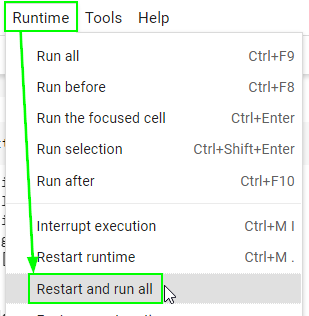

In [ ]:
print('🎯 Restart and run all successful')